### Assignment-20 Time_Series

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
df.tail()

,date,Ex_rate
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825
7587,10-10-2010 00:00,0.720825


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [8]:
df.dtypes

,0
date,object
Ex_rate,float64


In [9]:
df.shape

(7588, 2)

In [10]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [11]:
df.date[1]

'02-01-1990 00:00'

<Axes: >

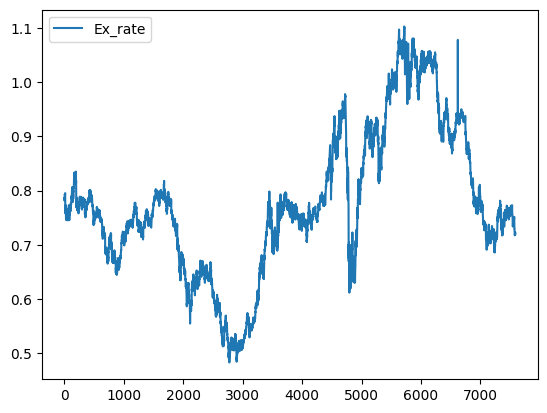

In [12]:
df.plot()

Model Building - ARIMA

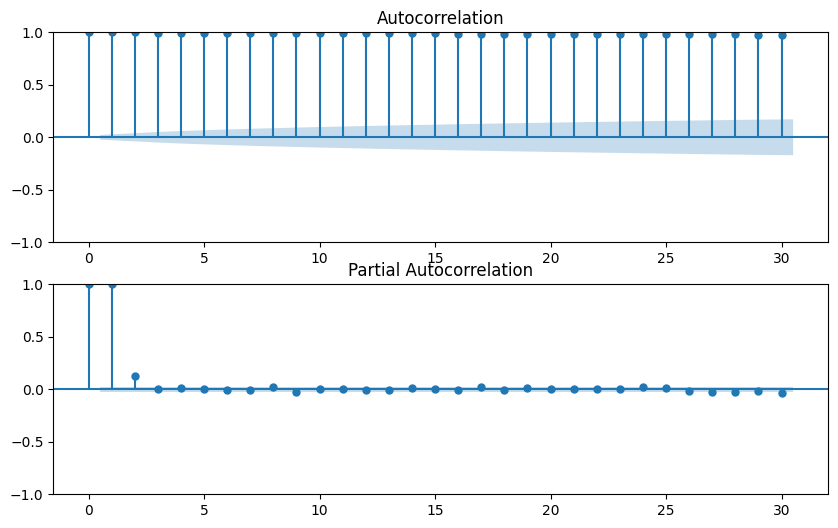

In [13]:
import statsmodels.api as sm

# Handle any missing values or anomalies identified during the exploration phase
df.interpolate(method='linear', inplace=True)

# Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to estimate initial parameters (p, d, q) for the ARIMA model
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(df['Ex_rate'], lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Ex_rate'], lags=30, ax=ax[1])
plt.show()

In [14]:
# Based on the ACF and PACF plots, select the initial parameters (p, d, q) for the ARIMA model
p, d, q = 1, 1, 1

# Fit the ARIMA model with the selected parameters to the preprocessed time series
model = sm.tsa.ARIMA(df['Ex_rate'], order=(p, d, q))
results = model.fit()

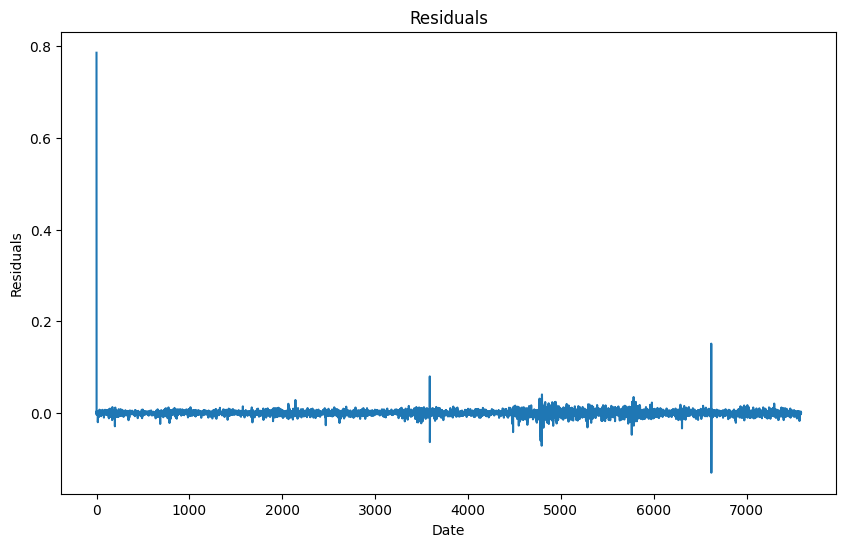

In [15]:
# Analyze the residuals to ensure there are no patterns that might indicate model inadequacies
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

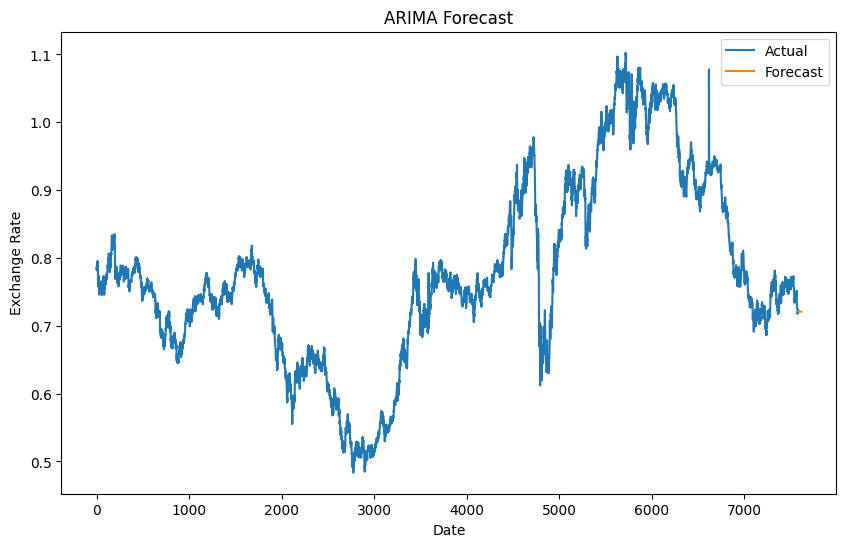

In [16]:
# Perform out-of-sample forecasting and visualize the predicted values against the actual values
forecast_steps = 30
# Only ask for the forecasted values
forecast = results.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast')
# Remove the confidence interval plotting since it is not available
# plt.fill_between(range(len(df) + forecast_steps), conf_int[:, 0], conf_int[:, 1], alpha=0.2, label='Confidence Interval')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Model Building - Exponential Smoothing

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters) based on the time series characteristics
model = Holt(df['Ex_rate'])

# Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components
fit = model.fit()
params = fit.params

# Fit the chosen Exponential Smoothing model and forecast future values
# Call forecast on the fit object returned by model.fit()
forecast = fit.forecast(steps=forecast_steps)

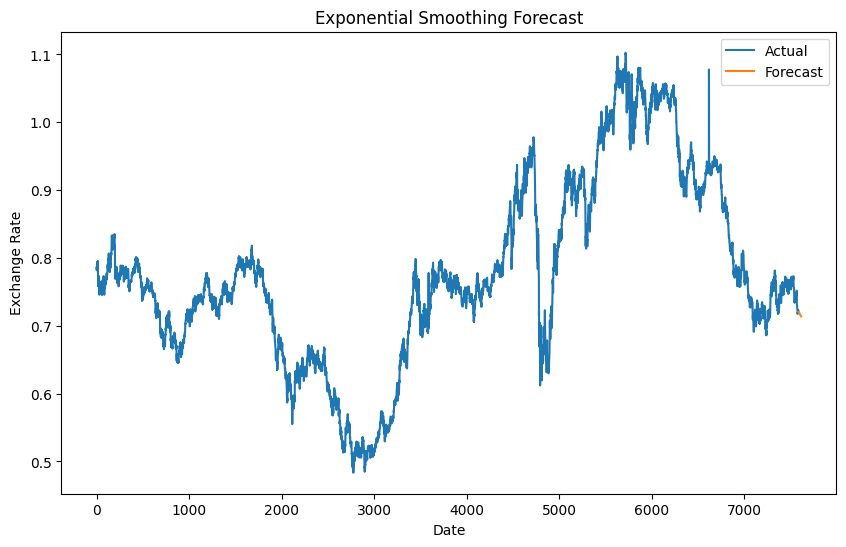

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Evaluation and Compariso

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Compute error metrics for both models
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
arima_mse = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast)
arima_mape = mean_absolute_percentage_error(df['Ex_rate'][-forecast_steps:], forecast)

es_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
es_mse = mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast)
es_mape = mean_absolute_percentage_error(df['Ex_rate'][-forecast_steps:], forecast)

In [20]:
# Print the error metrics for both models
print('ARIMA Error Metrics:')
print(f'MAE: {arima_mae:.2f}')
print(f'MSE: {arima_mse:.2f}')
print(f'MAPE: {arima_mape:.2f}%')

print('Exponential Smoothing Error Metrics:')
print(f'MAE): {es_mae:.2f}')
print(f'MSE: {es_mse:.2f}')
print(f'MAPE: {es_mape:.2f}%')

ARIMA Error Metrics:
MAE: 0.02
MSE: 0.00
MAPE: 0.02%
Exponential Smoothing Error Metrics:
MAE): 0.02
MSE: 0.00
MAPE: 0.02%
